# Lab | Customer Analysis Round 5

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.


### 1. Get the data

We are using the `marketing_customer_analysis.csv` file.


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore') 

In [96]:
data = pd.read_csv('marketing_customer_analysis.csv')
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [97]:
data = data.drop_duplicates()
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large



### 2. Dealing with the data

Already done in the round 2.



In [98]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [99]:
data.columns = data.columns.str.lower()
data.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [48]:
#data = data.rename(columns={'customer lifetime value':'customer_lifetime_value',
                            #'effective to date':'effective_to_date',
                            #'employmentstatus':'employment_status', 'number of open complaints':'number_of_open_complaints', 'number of policies': 'number_of_policies', 'policy type':'policy_type', 'renew offer type':'renew_offer_type', 'sales channel':'sales_channel', 'total claim amount': 'total_claim_amount', 'vehicle class':'vehicle_class', 'vehicle size': 'vehicle_size', 'vehicle type':'vehicle_type', 'location code':'location_code', 'marital status':'marital_status', 'monthly premium auto':'monthly_premium_auto', 'months since last claim': 'months_since_last_claim', 'months since policy inception':'months_since_policy_inception'})
#data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [104]:
# create a for loop and replace ' ' with '_'
# new_columns = [col.replace(' ', '_') for col in cols]

cols = data.columns
new_columns = []

for col in cols:
    new_col = col.replace(' ', '_')
    new_columns.append(new_col)

data.columns = new_columns

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

### 3. Explore the data

Some datasets have values that are missing, invalid, or otherwise difficult for an algorithm to process. If data is missing, the algorithm can’t use it. If data is invalid, the algorithm produces less accurate or even misleading outcomes. Some datasets are relatively clean but need to be shaped (e.g., aggregated or pivoted) and many datasets are just lacking useful business context (e.g., poorly defined ID values), hence the need for feature enrichment. Good data preparation produces clean and well-curated data which leads to more practical, accurate model outcomes.


   **3.1.- Determine the problems**
    
   **3.2.- Data cleaning** Cleaning the data is very important as the model learning from that data only, so if we feed inconsistent, appropriate data to model it will return garbage only, so it is required to make sure that the data does not contains any unseen problem.
     
       - Feature and Target Variables
       - Data Types
       - Missing data, check null values
       - Outliers
       - Duplicate data
        
   **3.3.- Feature selection** (Which variables are important to answer our questions?)
    
   **3.4.- Data transformation**

3.1.- Determine the problems

In [106]:
data.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [51]:

data.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [52]:
#Check any two values that have high corelations
data_corr = data.corr()
data_corr

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [110]:
#checking corr above 0.8 --> none
data_corr[(data_corr['customer_lifetime_value'] > 0.8) | (data_corr['customer_lifetime_value'] < -0.8)][['customer_lifetime_value', 'income']]

,customer_lifetime_value,income
customer_lifetime_value,1.0,0.024366


In [111]:
#Usally, if there are corr high then drop one of the two calues here

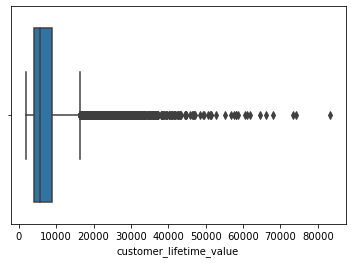

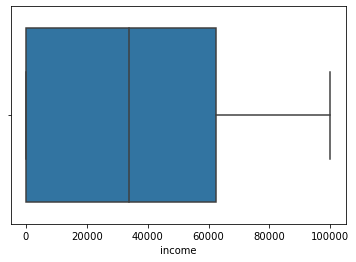

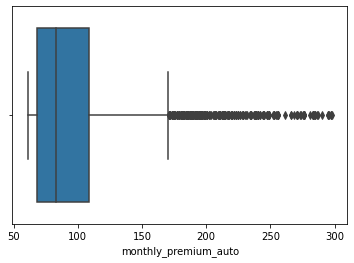

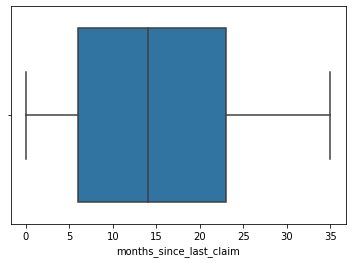

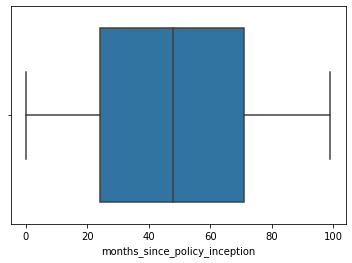

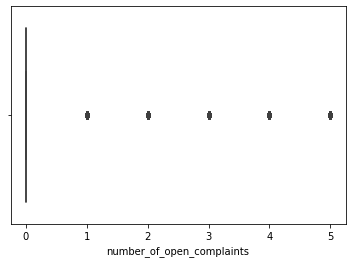

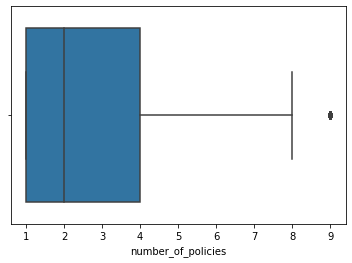

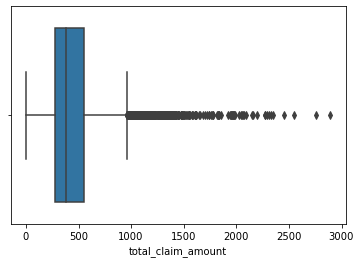

In [115]:
#Find outliers for each numerical - customer_lifetime_value

for column in data.select_dtypes(np.number).columns:
    sns.boxplot(x=data[column])
    plt.show()

In [116]:
#Problem: there are outliers in column customer_lifetime_value, monthly_premium_auto, number_of_policies, total_claim_amount which has to be data processed to create a good model

Problem: there are outliers in column customer_lifetime_value, monthly_premium_auto, number_of_policies, total_claim_amount which has to be data processed to create a good model

3.2.- Data cleaning



In [121]:
# Dear TA,
# I want to loop the process of removing the outliers one by one into a loop. 
# What is incorrect with the loop below??


for column in data[['customer_lifetime_value', 'monthly_premium_auto', 'number_of_policies', 'total_claim_amount']]:
    iqr = np.percentile(data[column],75) - np.percentile(data[column],25)
    upper_limit = np.percentile(data[column],75) + 1.5*iqr
    lower_limit = np.percentile(data[column],25) - 1.5*iqr
    data = data[(data['column']>lower_limit) & (data['column']<upper_limit)]

    
data

KeyError: 'column'

In [122]:
# DATA CLEANING FOR CUSTOMER LIFETIME VALUE
# removing outliers of each column with outliers
# first we find our interquartile range
iqr = np.percentile(data['customer_lifetime_value'],75) - np.percentile(data['customer_lifetime_value'],25) # data['IC1'].quantile(0.75)
iqr

4967.915247000001

In [123]:
np.percentile(data['customer_lifetime_value'],25),np.percentile(data['customer_lifetime_value'],75)

(3994.25179425, 8962.16704125)

In [124]:
upper_limit = np.percentile(data['customer_lifetime_value'],75) + 1.5*iqr
lower_limit = np.percentile(data['customer_lifetime_value'],25) - 1.5*iqr
upper_limit, lower_limit

(16414.039911750002, -3457.6210762500014)

In [125]:


data = data[(data['customer_lifetime_value']>lower_limit) & (data['customer_lifetime_value']<upper_limit)]
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,YM19146,California,4100.398533,No,Premium,College,1/6/11,Employed,F,47761,...,58,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [126]:
#at each step removing the outliers

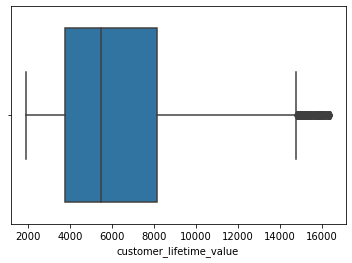

In [127]:
sns.boxplot(x=data['customer_lifetime_value']) 
plt.show()

In [128]:
# DATA CLEANING FOR monthly_premium_auto
iqr = np.percentile(data['monthly_premium_auto'],75) - np.percentile(data['monthly_premium_auto'],25) # data['IC1'].quantile(0.75)
iqr

39.0

In [129]:
upper_limit = np.percentile(data['monthly_premium_auto'],75) + 1.5*iqr
lower_limit = np.percentile(data['monthly_premium_auto'],25) - 1.5*iqr
upper_limit, lower_limit

(165.5, 9.5)

In [130]:
data = data[(data['monthly_premium_auto']>lower_limit) & (data['monthly_premium_auto']<upper_limit)]
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,YM19146,California,4100.398533,No,Premium,College,1/6/11,Employed,F,47761,...,58,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


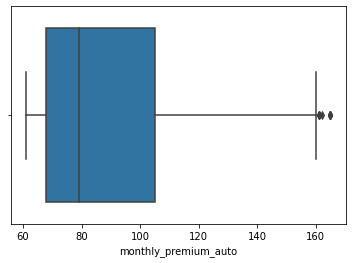

In [131]:
sns.boxplot(x=data['monthly_premium_auto']) 
plt.show()

In [132]:
#number_of_policies

iqr = np.percentile(data['number_of_policies'],75) - np.percentile(data['number_of_policies'],25) # data['IC1'].quantile(0.75)
iqr

3.0

In [133]:
upper_limit = np.percentile(data['number_of_policies'],75) + 1.5*iqr
lower_limit = np.percentile(data['number_of_policies'],25) - 1.5*iqr
upper_limit, lower_limit

(8.5, -3.5)

In [134]:
data = data[(data['number_of_policies']>lower_limit) & (data['number_of_policies']<upper_limit)]
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,YM19146,California,4100.398533,No,Premium,College,1/6/11,Employed,F,47761,...,58,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


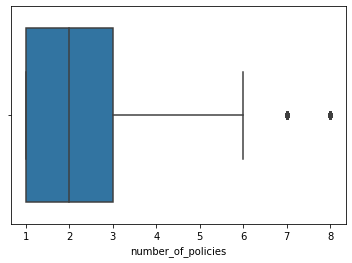

In [135]:
sns.boxplot(x=data['number_of_policies']) 
plt.show()

In [136]:
#total_claim_amount
iqr = np.percentile(data['total_claim_amount'],75) - np.percentile(data['total_claim_amount'],25) # data['IC1'].quantile(0.75)

upper_limit = np.percentile(data['total_claim_amount'],75) + 1.5*iqr
lower_limit = np.percentile(data['total_claim_amount'],25) - 1.5*iqr

data = data[(data['total_claim_amount']>lower_limit) & (data['total_claim_amount']<upper_limit)]
data

data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,YM19146,California,4100.398533,No,Premium,College,1/6/11,Employed,F,47761,...,58,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


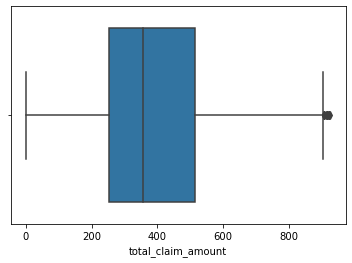

In [137]:
sns.boxplot(x=data['total_claim_amount']) 
plt.show()

3.3.- Feature selection


In [143]:
# Boxcox with def & loop. From class 'end to end'

def boxcox_transform(data):
    numeric_cols = data.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        data[column] = np.where(data[column]<=0, np.NAN, data[column]) 
        data[column] = data[column].fillna(data[column].mean())
        transformed_data, ci = stats.boxcox(data[column])
        data[column] = transformed_data
        _ci[column] = [ci] 
    return data, _ci

In [144]:
data, _ci = boxcox_transform(data)
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,5.819608,No,Basic,Bachelor,2/24/11,Employed,F,1291.240279,...,3.017041,0.672042,0.000000,Corporate Auto,Corporate L3,Offer1,Agent,112.363222,Two-Door Car,Medsize
2,AI49188,Nevada,6.572444,No,Premium,Bachelor,2/19/11,Employed,F,1183.145587,...,17.376257,0.672042,0.600913,Personal Auto,Personal L3,Offer1,Agent,150.380070,Two-Door Car,Medsize
3,WW63253,California,6.327800,No,Basic,Bachelor,1/20/11,Unemployed,M,1212.202066,...,26.137785,0.672042,1.326875,Corporate Auto,Corporate L2,Offer1,Call Center,143.007783,SUV,Medsize
4,HB64268,Washington,5.828968,No,Basic,Bachelor,2/3/11,Employed,M,1108.579647,...,19.446468,0.672042,0.000000,Personal Auto,Personal L1,Offer1,Agent,51.608116,Four-Door Car,Medsize
5,OC83172,Oregon,6.364457,Yes,Basic,Bachelor,1/25/11,Employed,F,1382.073889,...,34.428370,0.672042,0.600913,Personal Auto,Personal L3,Offer2,Web,57.573301,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,YM19146,California,6.021722,No,Premium,College,1/6/11,Employed,F,1168.181105,...,23.987822,0.672042,0.000000,Personal Auto,Personal L2,Offer1,Branch,145.318255,Four-Door Car,Large
9130,PK87824,California,5.878560,Yes,Extended,College,2/12/11,Employed,F,719.498642,...,13.700398,0.672042,0.000000,Corporate Auto,Corporate L3,Offer1,Branch,111.124133,Four-Door Car,Medsize
9131,TD14365,California,6.359100,No,Extended,Bachelor,2/6/11,Unemployed,M,1212.202066,...,17.022396,1.197684,0.600913,Corporate Auto,Corporate L2,Offer1,Branch,193.248798,Four-Door Car,Medsize
9132,UP19263,California,6.320132,No,Extended,College,2/3/11,Employed,M,726.337586,...,1.667567,0.672042,0.878996,Personal Auto,Personal L2,Offer3,Branch,174.660084,Four-Door Car,Large


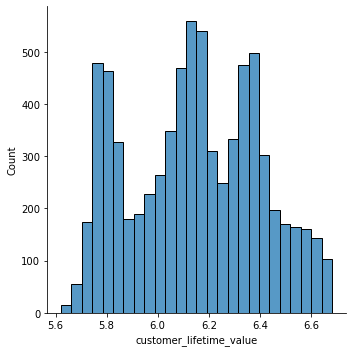

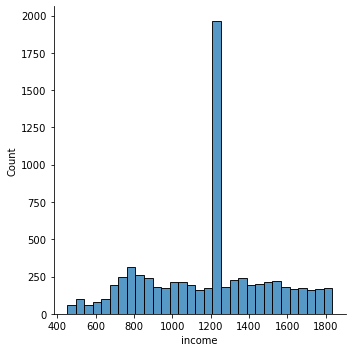

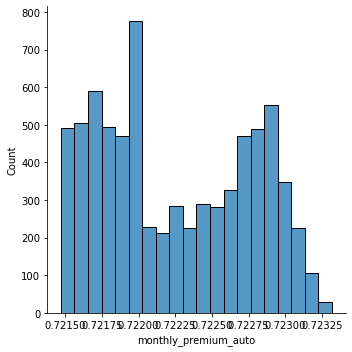

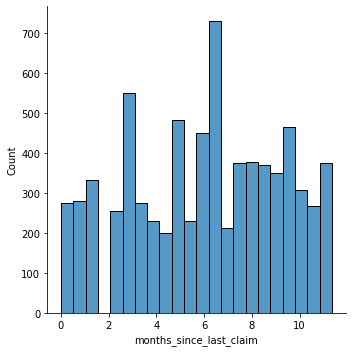

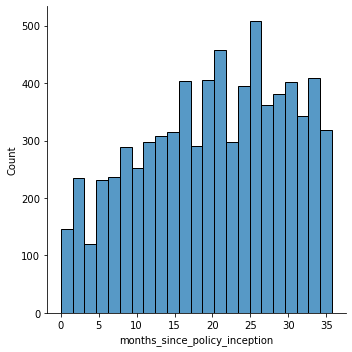

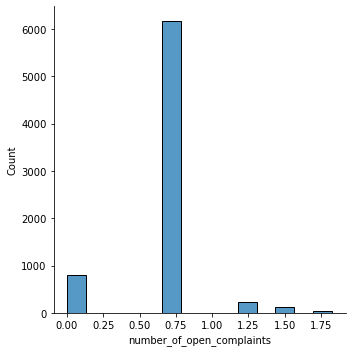

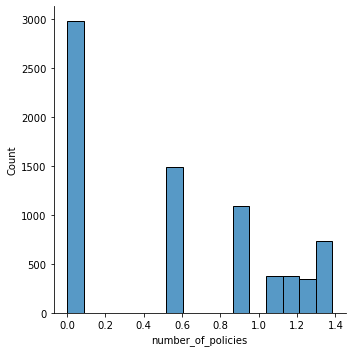

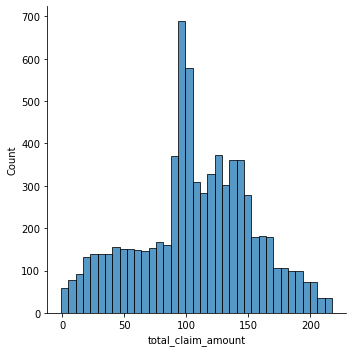

In [145]:
for column in data.select_dtypes(np.number).columns:
    sns.displot(data[column])
    plt.show()

### 4. Processing Data

(_Further processing..._)

- X-y split.
- Normalize (numerical).

In [151]:
data1 = data._get_numeric_data()
data1.head(3)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,5.819608,1291.240279,0.721858,10.714248,3.017041,0.672042,0.000000,112.363222
2,6.572444,1183.145587,0.722821,7.259758,17.376257,0.672042,0.600913,150.380070
3,6.327800,1212.202066,0.722792,7.259758,26.137785,0.672042,1.326875,143.007783


In [152]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(data1)
x_standardized = transformer.transform(data1)

data2=pd.DataFrame(x_standardized)
data2.head()

,0,1,2,3,4,5,6,7
0,-1.288515,0.334704,-0.766135,1.493709,-1.777954,0.10955,-1.096585,0.104126
1,1.689520,-0.005662,1.111361,0.385849,-0.278979,0.10955,0.086250,0.924764
2,0.721771,0.085830,1.054046,0.385849,0.635647,0.10955,1.515230,0.765625
3,-1.251489,-0.240453,-0.461432,-0.205319,-0.062868,0.10955,-1.096585,-1.207343
4,0.866775,0.620718,-0.766135,0.003704,1.501110,0.10955,0.086250,-1.078578


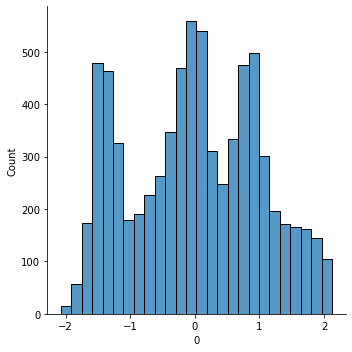

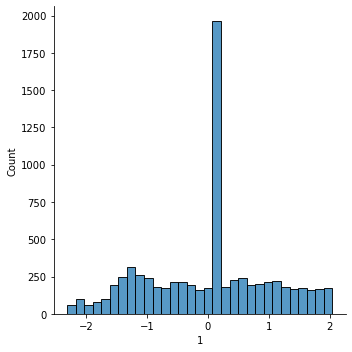

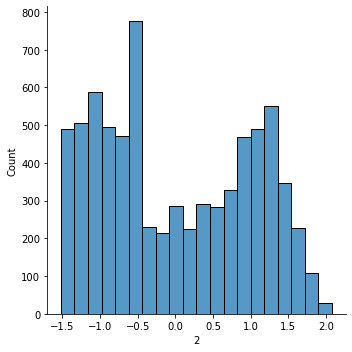

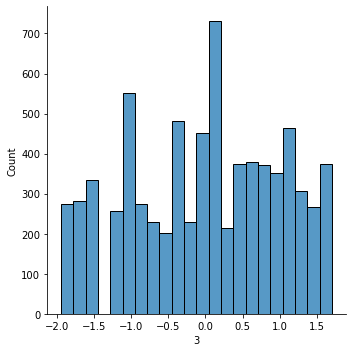

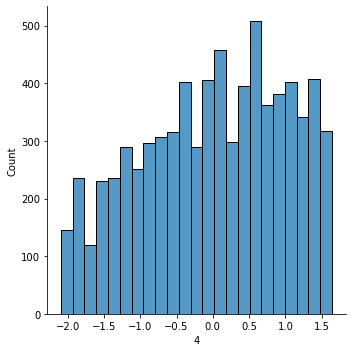

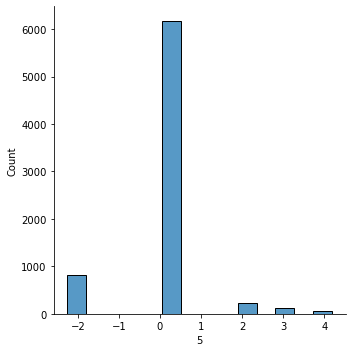

In [153]:
for i in range(6):
    sns.displot(data2.iloc[:,i])
    plt.show()